In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ds=pd.read_excel('Telco-Customer-Churn.xlsx')

D:\anaconda\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [3]:
ds

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0.0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0.0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0.0,Yes,Yes,11.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1.0,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


# 1. Compare churn count with respect to gender.

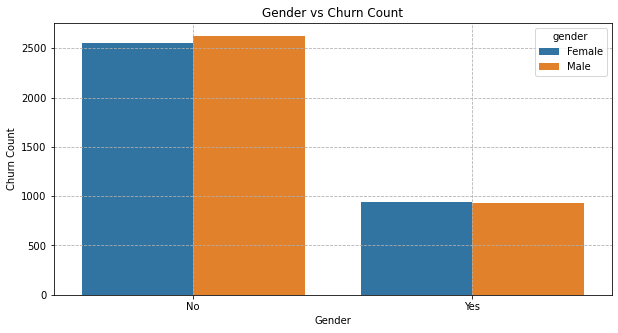

In [36]:

plt.figure(figsize=(10,5))
sns.countplot(x=ds['Churn'],hue= ds['gender'],)
plt.title("Gender vs Churn Count")
plt.xlabel("Gender")
plt.ylabel("Churn Count")
plt.grid(linestyle= '--')
plt.show()

In [18]:
pd.crosstab(ds["gender"],ds["Churn"])

Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


# 2. Find out how many female senior citizens there in the dataset

In [19]:
ds['gender'].value_counts(ascending=True)

Female    3488
Male      3555
Name: gender, dtype: int64

In [20]:
pd.crosstab(ds['gender'],ds['SeniorCitizen'])

SeniorCitizen,0.0,1.0
gender,,
Female,2920,568
Male,2981,574


D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


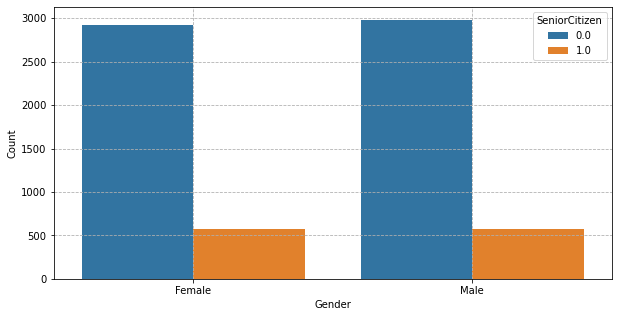

In [38]:
plt.figure(figsize=(10,5))
sns.countplot(ds['gender'],hue=ds['SeniorCitizen'])
plt.xlabel('Gender',fontsize=10)
plt.ylabel('Count',fontsize=10)
plt.grid(linestyle ='--')
plt.show()

# 3. Compare 'tenure' with 'Total Charges'

In [25]:
ds[['tenure','TotalCharges']]

,tenure,TotalCharges
0,1.0,29.85
1,34.0,1889.50
2,2.0,108.15
3,45.0,1840.75
4,2.0,151.65
...,...,...
7038,24.0,1990.50
7039,72.0,7362.90
7040,11.0,346.45
7041,4.0,306.60


D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


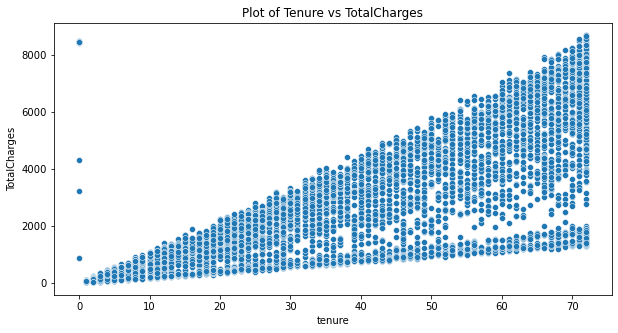

In [26]:
plt.figure(figsize=(10,5))
sns.scatterplot(ds['tenure'],ds['TotalCharges'])
plt.title("Plot of Tenure vs TotalCharges")
plt.show()

# 4. Find out which contract is preferred by the senior citizen 

<Figure size 720x360 with 0 Axes>

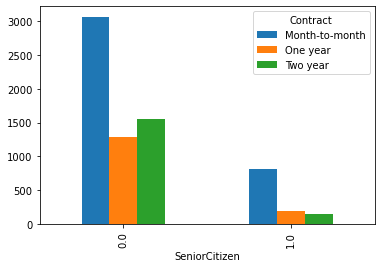

In [27]:
plt.figure(figsize=(10,5))
pd.crosstab(ds['SeniorCitizen'],ds['Contract']).plot(kind = 'bar')
plt.show()

In [39]:
pd.crosstab(ds['SeniorCitizen'],ds['Contract'])

Contract,Month-to-month,One year,Two year
SeniorCitizen,,,
0.0,3068,1283,1550
1.0,807,190,145


# 5. Comment on your finds on Payment Method?

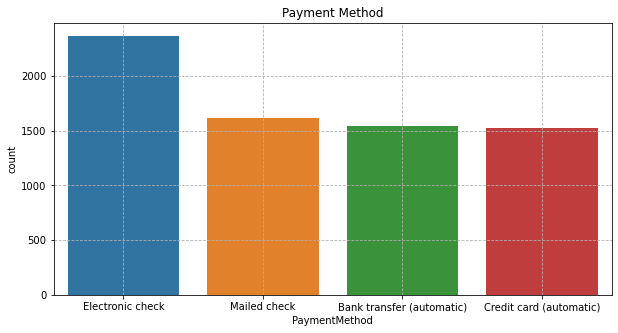

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(x=ds['PaymentMethod'])
plt.title('Payment Method')
plt.grid(linestyle= '--')
plt.show()

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


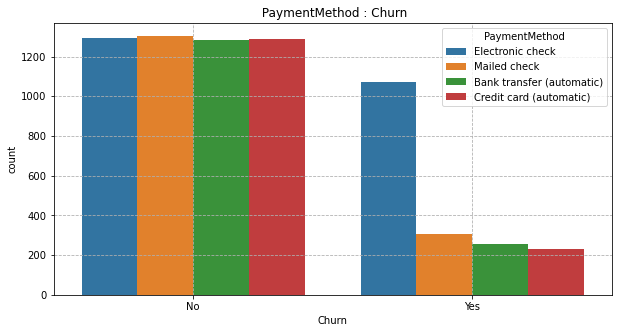

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(ds['Churn'],hue = ds['PaymentMethod'])
plt.title(" PaymentMethod : Churn")
plt.grid(linestyle= '--')
plt.show()

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


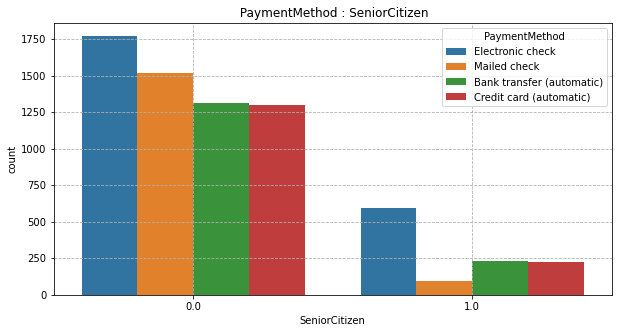

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(ds['SeniorCitizen'],hue = ds['PaymentMethod'])
plt.title(" PaymentMethod : SeniorCitizen")
plt.grid(linestyle= '--')
plt.show()

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


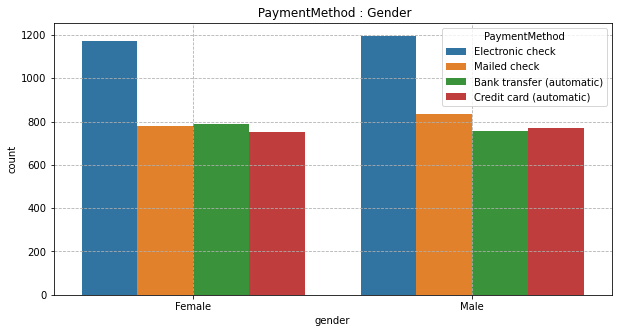

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(ds['gender'],hue = ds['PaymentMethod'])
plt.title(" PaymentMethod : Gender")
plt.grid(linestyle= '--')
plt.show()